In [2]:
import os
import time

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib.font_manager import FontProperties

from collections import Counter
# import jieba
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import joblib
import re
import matplotlib.pyplot as plt

In [3]:
def is_all_English(string):
    for char in string:
        if (not char.isalpha()):
            return False
    return True

In [4]:
# def jieba_cut_sentence(str):
#     word_list = []
#     str = re.sub('[^\u4e00-\u9fa5]+', '', str)

#     words = word_tokenize.cut(str)

#     for word in words:
#         if is_all_English(word):
#             word_list.append(word)
#     return word_list

In [5]:
def mail2vector(path, word_set: dict, func):
    vector = word_set.copy()
    sentences = []
    with open(path, 'r', encoding='gbk', errors='ignore') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line == '' or not line[0].isalpha():
                continue
            if line.startswith(("Received:","Newsgroups:","Path:","From:","Subject:","Message-Id:","Sender:","Organization:","Date:","Content-Type:","Content-Length:","Apparently-To:")):
                continue
            sentences.append(line)
        f.close()
    for line in sentences:
        for word in func(line):
            vector[word + '\n'] = 1 if is_all_English(word) else 0
    return vector

In [6]:
# func = jieba_cut_sentence

# root_path = './trec06c/data'
# sequences = os.listdir(root_path)
# sequences.sort()
# sequences = sequences[:20]

# file_count = 0

# start_partition_time = time.time()
# for dir in sequences:
#     files = os.listdir(os.path.join(root_path, dir))
#     files.sort()
#     for file in files:
#         vector = mail2vector(os.path.join(root_path, dir, file), word_set, func)
#         datas.append(list(vector.values()))
#         file_count += 1
# end_partition_time = time.time()

In [7]:
ind = './trec06p/full'

spam_cnt = 0
ham_cnt = 0
stat = {0: [], 1: []}
word_cnt = {0: {}, 1: {}}
counter0 = Counter()
counter1 = Counter()
with open(os.path.join(ind, "index"), 'r', encoding='gbk', errors='ignore') as f:
    lines = f.readlines()[:6000]
    
    
    for line in lines:
        att = line.split(" ")
        sentences = []
        words = []
        with open(os.path.join(ind, att[1][:-1]), 'r', encoding='gbk', errors='ignore') as m:
            mlines = m.readlines()
            for mline in mlines:
                mline = mline.strip()
                if mline == '' or not mline[0].isalpha():
                    continue
                sentences.append(mline)
                for word in word_tokenize(mline):
                    if is_all_English(word):
                        words.append(word)
            m.close()
        counter = Counter(words)
        
        if att[0] == "spam":
            stat[1].append(sum([len(sentence) for sentence in sentences]))
            counter0 = counter0 + counter
        else:
            stat[0].append(sum([len(sentence) for sentence in sentences]))
            counter1 = counter1 + counter

    f.close()
    
    
word_cnt[0] = dict(counter0)
word_cnt[1] = dict(counter1)
# print(word_cnt)

{0: {'Received': 6075, 'from': 6955, 'unknown': 1792, 'HELO': 581, 'by': 7421, 'with': 7437, 'SMTP': 1901, 'id': 4960, 'Sat': 1297, 'Apr': 1417, 'auditor': 4, 'for': 6765, 'whitney': 2, 'Date': 3199, 'From': 3745, 'Stella': 2, 'Lowry': 4, 'rookcuduq': 2, 'To': 3800, 'Brian': 6, 'bernice': 6, 'Subject': 3732, 're': 95, 'Normal': 1127, 'LUXURY': 34, 'WATCHES': 40, 'BUY': 34, 'YOUR': 112, 'OWN': 52, 'ROLEX': 74, 'FOR': 96, 'ONLY': 72, 'Rolex': 92, 'Cartier': 40, 'Bvlgari': 40, 'Frank': 38, 'Muller': 36, 'Patek': 36, 'Philippe': 36, 'Vacheron': 34, 'Constantin': 34, 'Lange': 34, 'Sohne': 34, 'Audemars': 34, 'Piguet': 34, 'IWC': 40, 'Officine': 34, 'Panerai': 34, 'Breitling': 34, 'Omega': 38, 'Tag': 44, 'Heuer': 42, 'Exapmle': 34, 'Full': 59, 'Gold': 216, 'Daytona': 34, 'MEN': 34, 'only': 405, 'Visit': 88, 'our': 1604, 'shop': 34, 'at': 1437, 'http': 3944, 'Wed': 1248, 'vudwwhp': 2, 'Walter': 6, 'trwmpca': 2, 'arline': 2, 'Take': 61, 'a': 6861, 'moment': 37, 'to': 7526, 'explore': 42, 'this

In [8]:
print(len(stat[0]), len(stat[1]))

2287 3713


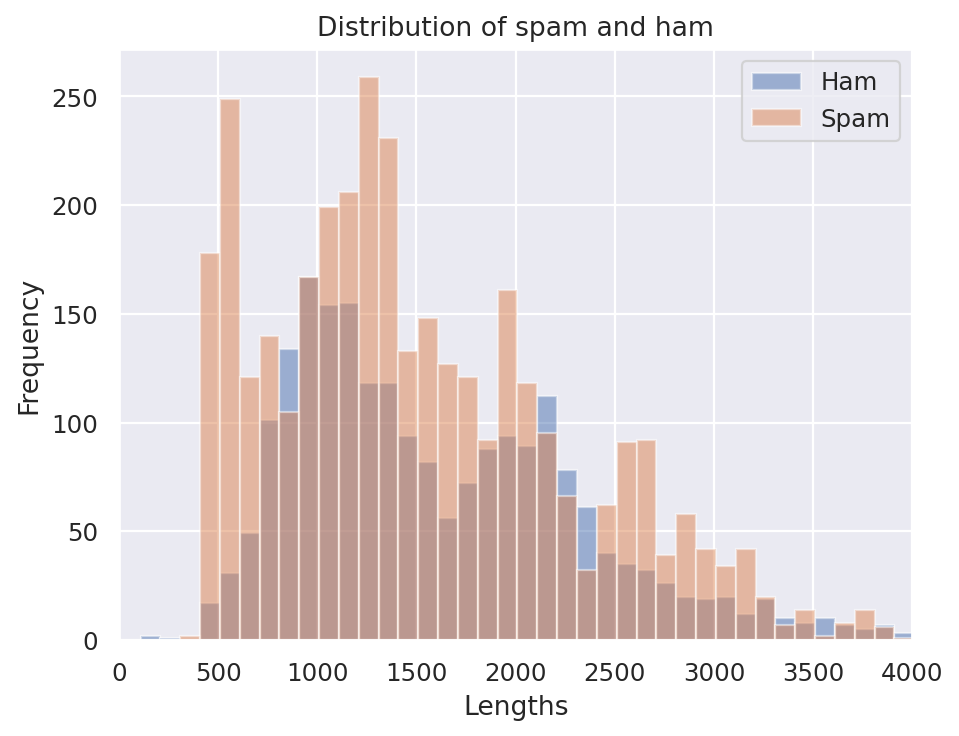

<Figure size 640x480 with 0 Axes>

In [26]:
import numpy as np

bin_width=100
bins=np.arange(min(stat[0]),max(stat[0])+bin_width, bin_width)

plt.figure(dpi = 160)
plt.hist(stat[0], bins=bins, alpha=0.5, label='Ham')
plt.hist(stat[1], bins=bins, alpha=0.5, label='Spam')

plt.xlabel('Lengths')
plt.ylabel('Frequency')
plt.title('Distribution of spam and ham')

plt.xlim(0, 4000)
plt.legend()

plt.show()
plt.savefig("./distribution.pdf")

('br', 'the', 'and', 'to', 'with', 'by', 'from', 'a', 'for', 'of', 'Received', 'in', 'id', 'is', 'handyboard', 'http', 'To', 'From', 'Subject', 'DIV', 'you', 'A', 'Date', 'ESMTP', 'I', 'BR', 'Microsoft', 'B', 'your', 'Jan') (9640, 9271, 8419, 7526, 7437, 7421, 6955, 6861, 6765, 6212, 6075, 5876, 4960, 4835, 3962, 3944, 3800, 3745, 3732, 3668, 3522, 3278, 3199, 3060, 2850, 2736, 2658, 2451, 2358, 2283)


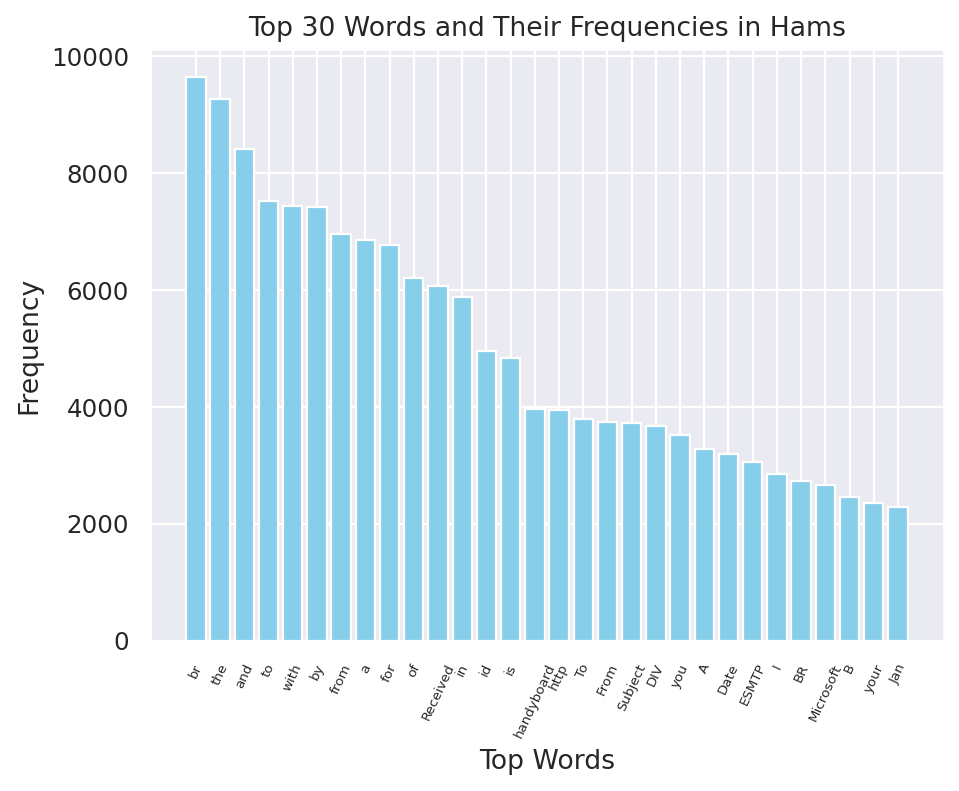

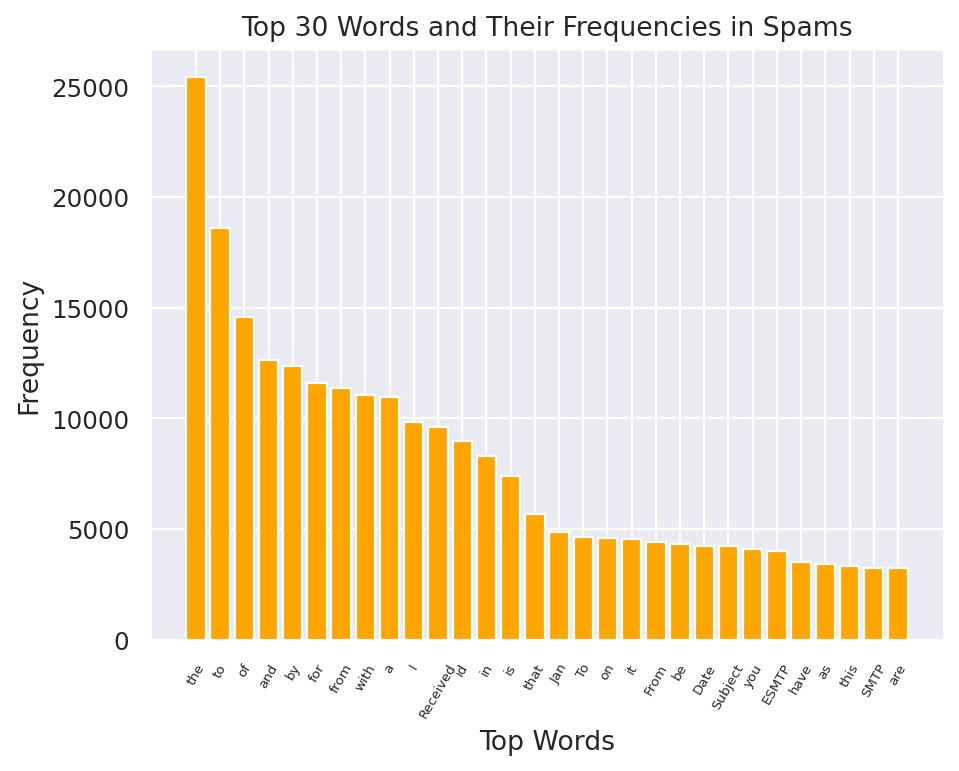

In [24]:
sns.set_theme()

# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False

ham_top30 = counter0.most_common(30)
elements_dict1, frequencies_dict1 = zip(*ham_top30)

print(elements_dict1, frequencies_dict1)

spam_top30 = counter1.most_common(30)
elements_dict2, frequencies_dict2 = zip(*spam_top30)

bar_width = 1
index = range(30)

plt.figure(dpi = 160)
plt.bar(elements_dict1, frequencies_dict1, color='skyblue')
# sns.barplot(x = elements_dict1, y = frequencies_dict1, hue=elements_dict1, palette=palette, dodge=False, legend=False)
# sns.barplot(
#     x = elements_dict1, y = frequencies_dict1, 
#     hue=elements_dict1, palette="vlag", dodge=False, legend=False, edgecolor='none', width=1
# )
plt.xticks(rotation = 65, fontsize = 6)
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.title(f'Top 30 Words and Their Frequencies in Hams')
plt.show()


plt.figure(dpi = 160)
plt.bar(elements_dict2, frequencies_dict2, color='orange')
# sns.barplot(
#     x = elements_dict2, y = frequencies_dict2, 
#     hue=elements_dict2, palette="vlag", dodge=False, legend=False, edgecolor='none', width=1
# )
plt.xticks(rotation = 60, fontsize = 6)
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.title(f'Top 30 Words and Their Frequencies in Spams')
plt.show()